(imagerie-optique-chapitre)=
# Imagerie optique

<table>
  <tr>
    <td align="center">
      <a href="https://github.com/Xanthylajoie">
        <img src="https://avatars.githubusercontent.com/u/90349544?v=4?s=100" width="100px;" alt=""/>
        <br /><sub><b>Xanthy Lajoie</b></sub>
      </a>
      <br />
        <a title="Contenu">🤔</a>
        <a title="Révision du texte">👀</a>
    </td>
    <td align="center">
      <a href="https://github.com/pbellec">
        <img src="https://avatars.githubusercontent.com/u/1670887?v=4?s=100" width="100px;" alt=""/>
        <br /><sub><b>Pierre bellec</b></sub>
      </a>
      <br />
        <a title="Contenu">🤔</a>
        <a title="Révision du texte">👀</a>
    </td>
    <td align="center">
      <a href="https://github.com/eddyfortier">
        <img src="https://avatars.githubusercontent.com/u/72314243?v=4?s=100" width="100px;" alt=""/>
        <br /><sub><b>Eddy Fortier</b></sub>
      </a>
      <br />
        <a title="Révision du texte">👀</a>
    </td>
    <td align="center">
      <a href="https://github.com/sangfrois">
        <img src="https://avatars.githubusercontent.com/u/38385719?v=4?s=100" width="100px;" alt=""/>
        <br /><sub><b>François Lespinasse</b></sub>
      </a>
      <br />
        <a title="Révision du texte">👀</a>
    </td>
    <td align="center">
      <a href="https://github.com/me-pic">
        <img src="https://avatars.githubusercontent.com/u/77584086?v=4?s=100" width="100px;" alt=""/>
        <br /><sub><b>Marie-Eve Picard</b></sub>
      </a>
      <br />
        <a title="Révision du texte">👀</a>
    </td>
    <td align="center">
      <a href="https://github.com/anproulx">
        <img src="https://avatars.githubusercontent.com/u/65092948?v=4?s=100" width="100px;" alt=""/>
        <br /><sub><b>Andréanne Proulx</b></sub>
      </a>
      <br />
        <a title="Révision du texte">👀</a>
    </td>    
  </tr>
</table>

```{warning}
Ce chapitre va être mis à jour à l'automne 2022. En particulier les exercices vont être révisés, et certains exercices pourraient être ajoutés ou supprimés.
```

L'imagerie optique cérébrale, encore appelée spectroscopie proche infrarouge fonctionnelle, est une technique qui permet de mesurer les corrélats vasculaires de l'activité cérébrale, de manière assez similaire à l'IRMf. En revanche, elle repose sur un principe physique très différent: la diffusion et l'absorption de la lumière dans les tissus cérébraux. Ses limites et faiblesses sont aussi bien distinctes de l'IRMf.

```{figure} imagerie_optique/fnirs.jpg
---
width: 600px
name: fnirs-fig
---
Système d'imagerie optique [NTS gowerlabs](https://www.gowerlabs.co.uk/nts-main). Image tirée de [wikipedia](https://en.wikipedia.org/wiki/Functional_near-infrared_spectroscopy#/media/File:Blonde_fNIRS_lady.jpg) sous licence [CC-BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0).
```

Les objectifs spécifiques de ce chapitre sont :
 * Principes physiques et physiologiques de l'imagerie optique.
 * Acquisition et traitement d'images en imagerie optique.
 * Applications de l'imagerie optique en neuroscience cognitive.

## Principes physiques et physiologiques

### Lumière infrarouge et tissus biologiques

In [1]:
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/61rWjVkpgh0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

La lumière pénètre et diffuse au travers des tissus biologiques. Cela peut être observé facilement, par exemple en plaçant une lampe de poche derrière votre main. Votre main est en partie transparente et la lumière peut la pénétrer. Certains tissus vont plus absorber la lumière que d'autres, et permettre de voir le genre de tissus présent à l’intérieur de notre main. Mais quel genre de tissus exactement? cela va dépendre du genre de lumière... La lumière proche infra-rouge est intéressante de ce point de vue, car elle est particulièrement absorbée par l'hémoglobine. La vidéo ci-dessus permet ainsi d'observer assez clairement la vascularisation de la main avec de la lumière (et une caméra) proche-infrarouge. Karl von Vierordt en 1876 avait déjà pu remarquer qu'il était possible d'observer la diminution d'oxyhémoglobine dans la main avec cette technique, en limitant l'arrivée de sang dans la main au moyen d'une ligature. L'imagerie optique cérébrale repose aussi sur les propriétés physiques de la lumière proche infra-rouge dans les tissus biologiques.

### Spectre d'absorption des tissus
```{figure} imagerie_optique/spectre_hemoglobine.png
---
width: 600px
name: spectre-hemoglobine-fig
---
Niveau d'absorption de la lumière par l'oxy- et la déoxy-hémoglobine, en fonction de la longueur d'onde. La région proche infrarouge (NIR, near infra-red) est indiquée. Image tirée de [Abtahi et al. (2017)](https://doi.org/10.3390/healthcare5020020) sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0).
```
Ce diagramme représente quelles longueurs d'ondes de la lumière sont absorbées par l'oxy- et la déoxy-hémoglobine, donc HbO2 (hémoglobine oxygénée en rouge) et HbR (hémoglobine non oxygénée en bleu). On peut voir qu'il y a des longueurs d'onde pour lesquelles le niveau d'absorption HbO2 vs HbRest très différent. Par exemple, à 700 nanomètres la lumière est plus absorbée par HbR, alors qu'à 900 nanomètres la lumière est plus absorbée par HbO2. Si on peut mesurer le niveau d'absorption dans le sang pour ces deux couleurs, en les comparant, on va pouvoir essayer de dissocier les concentrations en HbO2 et HbR.  Un autre point important: ces longueurs d'onde sont très peu absorbées par l'eau, et la lumière proche infra-rouge va bien pénétrer dans les tissus biologiques. Donc, juste en étudiant la quantité d'absorption de deux longueurs d'onde proche infrarouge dans le cerveau, on va pouvoir quantifier le contenu en HbO2 et HB! Mais reste à savoir comment on peut faire cette mesure de manière localisée dans une petite région du cerveau.

### Diffusion de la lumière
```{figure} imagerie_optique/nir-diffusion.png
---
width: 300px
name: nir-diffusion-fig
---
Mesure localisée dans le cerveau en imagerie optique. Un *émetteur* de lumière proche infrarouge est appliqué sur le scalp. Cette lumière est diffusée dans le cerveau. Après avoir traversé une petite portion de tissus cérébraux, elle va être émise de nouveau à la surface du scalp, et mesurée par un *récepteur* Image tirée de [Abtahi et al. (2017)](https://doi.org/10.3390/healthcare5020020) sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0).
```
Dans le premier exemple que l'on a vu, avec une lampe qui illumine la main, la lumière traverse notre main en ligne droite depuis la lampe, jusqu'à notre oeil. Si l'on applique le même principe au cerveau, la lumière va traverser l'ensemble des tissus, et on ne pourra pas identifier quelle région du cerveau a absorbé la lumière. On ne pourra jamais faire des images avec cette méthode.
Mais si on envoie de la lumière dans le cerveau, une partie de cette lumière va se diffuser, selon un principe de marche aléatoire. Si on regarde le scalp autour de l'émetteur de lumière, la lumière diffusée va pouvoir être mesurée. Plus on va loin de l’émetteur, et plus cette lumière a traversé loin dans le cerveau. Si on va trop loin, de nombreux tissus seront mélangés. Si on va trop près, la lumière diffusée n'aura pas pénétré jusqu'au cerveau. Mais si on met notre détecteur à la bonne distance de l’émetteur (quelques cms), cette lumière aura traversé une région spécifique du cerveau, qui aura une forme en "U".

```{admonition} Attention!
:class: caution attention
:name: nirs-warning
Seules les régions cérébrales proches du scalp pourront être mesurées précisément avec l'imagerie optique. Pour mesurer de la lumière qui a pénétré très profondément dans le cerveau, il faudra que celle ci traverse de nombreux tissus, et on n'aura pas une mesure spécifique des tissus profonds.
```

### Couplage neurovasculaire
On a maintenant vu le principe physique qui nous permet de mesurer la concentration en HbO2 et HbRdans une région (superficielle) du cerveau. Le principe physiologique sur lequel repose l'imagerie optique est le même que pour l'IRMf, c'est-à-dire le **couplage neurovasculaire**. Vous pouvez vous référez à la [section](couplage-neurovasculaire-irmf-section) du chapitre sur l'IRMf pour plus de détails. Brièvement, l'activité neuronale, notamment post-synaptique, requiert une consommation d'oxygène au niveau des cellules gliales, immédiatement à proximité des neurones concernés. Cette consommation d'oxygène va entrainer une augmentation d'HbO2 et une diminution relative d'HbRà proximité des populations de neurones activés. C'est ce phénomène de couplage neurovasculaire qu'on mesure à la fois en IRMf et en imagerie optique.

## Acquisition et traitement


### Recalage avec l'anatomie
```{figure} imagerie_optique/fiducials.png
---
width: 800px
name: fiducials-fig
---
Points de repères sur la tête et alignement imagerie optique / IRM. Haut à gauche: installation d'un montage d'imagerie optique sur un jeune participant. Haut à droite: différents points de repères standards sont identifiés sur la tête du participant. Bas: ces mêmes points de repère sont manuellement identifiés sur une reconstruction 3D du visage en IRM. Ces points de repères sont utilisés pour recaler la position des émetteurs / récepteurs d'imagerie optique avec l'IRM structurelle du participant. Figure tirée de [LLoyd-Fox et al. (2014)](https://doi.org/10.1117/1.nph.1.2.025006) sous licence [CC Attribution unported 3.0](https://creativecommons.org/licenses/by/3.0/).
```
Afin de localiser l'activité cérébrale mesurée, il est courant d'utiliser une IRM structurelle du participant de recherche. Il est alors important de pouvoir situer les émetteurs et récepteurs de lumière proche infrarouge par rapport aux différentes régions du cerveau. Deux techniques principales sont utilisées. La première technique consiste à utiliser certais points de repères anatomiques sur la tête du participant, tel qu'illustré dans la {numref}`fiducials-fig`. Ces points de repère sont aussi visibles dans l'IRM structurelle, et permettent de mettre en correspondence les deux types de mesure. La deuxième approche consiste à utiliser un système de **neuronavigation**, comme par exemple ce [système](https://www.neurocaregroup.com/brainsight-nirs) qui utilise des caméras pour mettre en correspondence la position des émetteurs et récepteurs de lumière proche infrarouge avec l'IRM structurelle.

### Montage

In [2]:
# Importe les librairies
import os.path as op
import numpy as np
import matplotlib.pyplot as plt
from itertools import compress
import mne

# Charge les données
fnirs_data_folder = mne.datasets.fnirs_motor.data_path()
fnirs_cw_amplitude_dir = op.join(fnirs_data_folder, 'Participant-1')
raw_intensity = mne.io.read_raw_nirx(fnirs_cw_amplitude_dir, verbose=True)
raw_intensity.load_data()
subjects_dir = op.join(mne.datasets.sample.data_path(), 'subjects')

# Améliore les annotations du jeu de données
raw_intensity.annotations.set_durations(5)
raw_intensity.annotations.rename({'1.0': 'CTL',
                                  '2.0': 'Gauche',
                                  '3.0': 'Droite'})
unwanted = np.nonzero(raw_intensity.annotations.description == '15.0')
raw_intensity.annotations.delete(unwanted)

# Visualize le montage
fig = plt.figure(figsize=(10, 10), dpi=300)

brain = mne.viz.Brain(
    'fsaverage', subjects_dir=subjects_dir, background='w', cortex='0.5')
brain.add_sensors(
    raw_intensity.info, trans='fsaverage',
    fnirs=['channels', 'pairs', 'sources', 'detectors'])
brain.show_view(azimuth=20, elevation=60, distance=400)
brain.save_image('imagerie_optique/fnirs-montage.png')

Loading /home/pbellec/mne_data/MNE-fNIRS-motor-data/Participant-1


Reading 0 ... 23238  =      0.000 ...  2974.464 secs...


Using pyvistaqt 3d backend.



Channel types::	fnirs_cw_amplitude: 56


<Figure size 3000x3000 with 0 Axes>

```{figure} imagerie_optique/fnirs-montage.png
---
width: 600px
name: fnirs-montage-fig
---
Un montage d'émetteurs/récepteurs en imagerie optique cérébrale. La position des sources de lumière est indiquée en rouge, la position des récepteurs est indiquée en noir. La position des sources, qui correspond aux tissus cérébraux entre la source et l'émetteur, est indiquée par des points oranges, et la trajectoire de la lumière est indiquée par des traits blancs. Cette figure est générée par du code python adapté d'un [tutoriel](https://mne.tools/stable/auto_tutorials/preprocessing/70_fnirs_processing.html#sphx-glr-auto-tutorials-preprocessing-70-fnirs-processing-py) de la librairie [MNE python](https://mne.tools) (cliquer sur + pour voir le code), et est distribuée par P. Bellec sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).
```

On voit dans la figure {numref}`fnirs-montage-fig` un montage où on va avoir différents canaux qui peuvent être activés en pairs (récepteur + émetteur). Chaque mesure est faite selon un ligne qui rejoint le récepteur à l'émetteur, et le point milieu (la _source_) est indiquée en orange. Différents montages existent, qui varient aussi bien par le nombre d'émetteurs et de récepteurs que leur disposition. Ces montages vont donner plus ou moins de résolution spatiale et d'accès aux sources profondes, et seront aussi plus ou moins dispendieux et complexes à installer selon le nombre des capteurs utilisés.

### Artefact de mouvement

Using matplotlib as 2D backend.


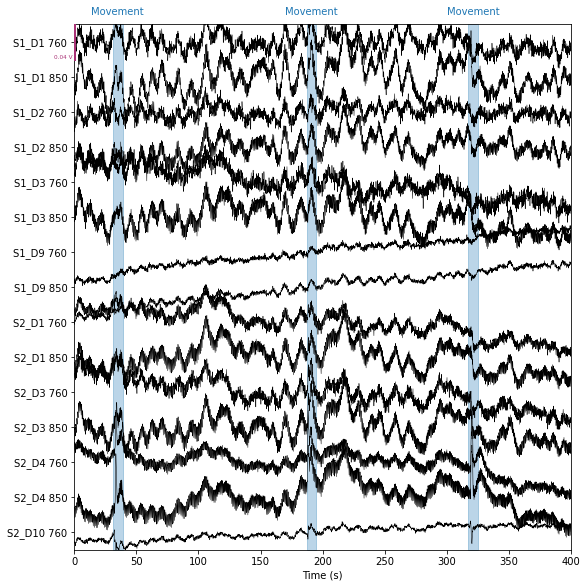

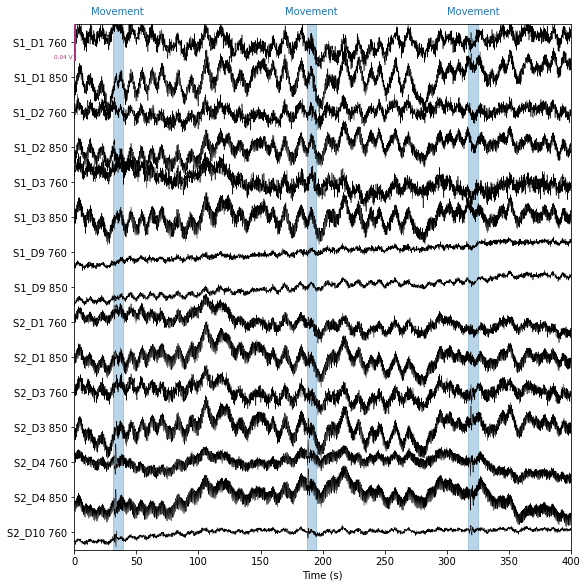

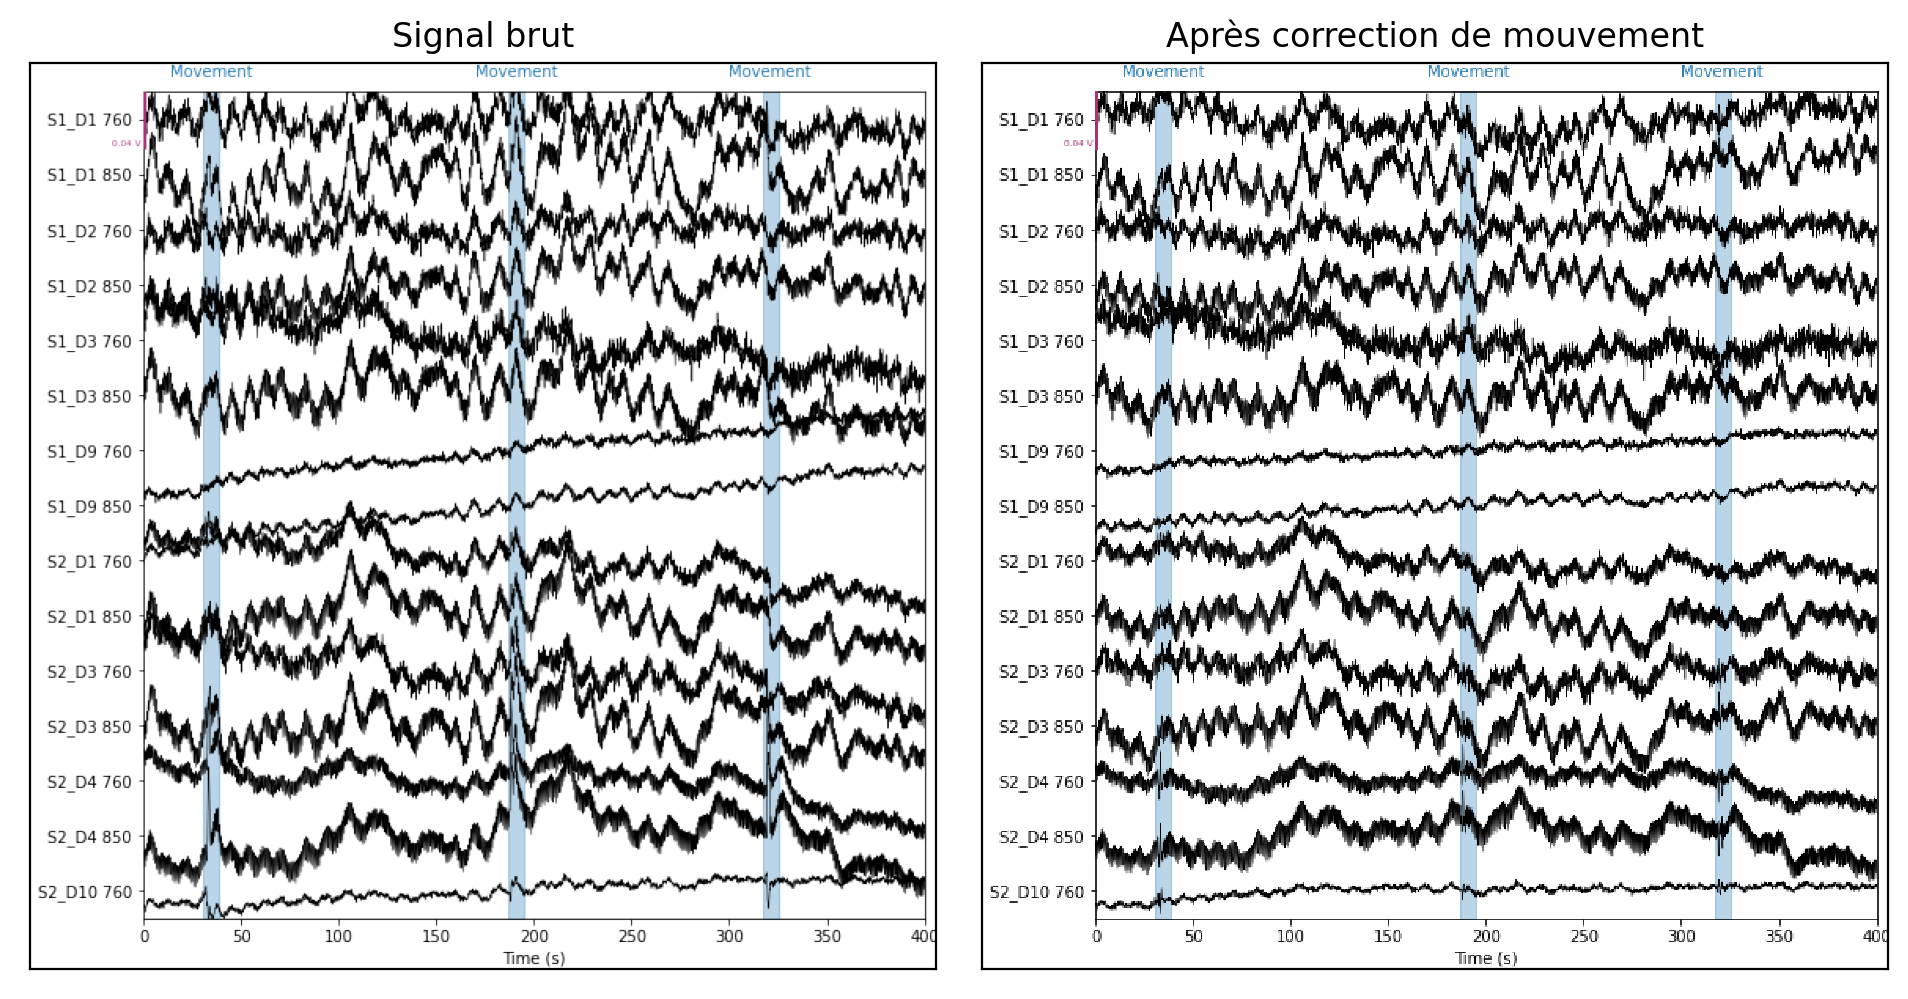

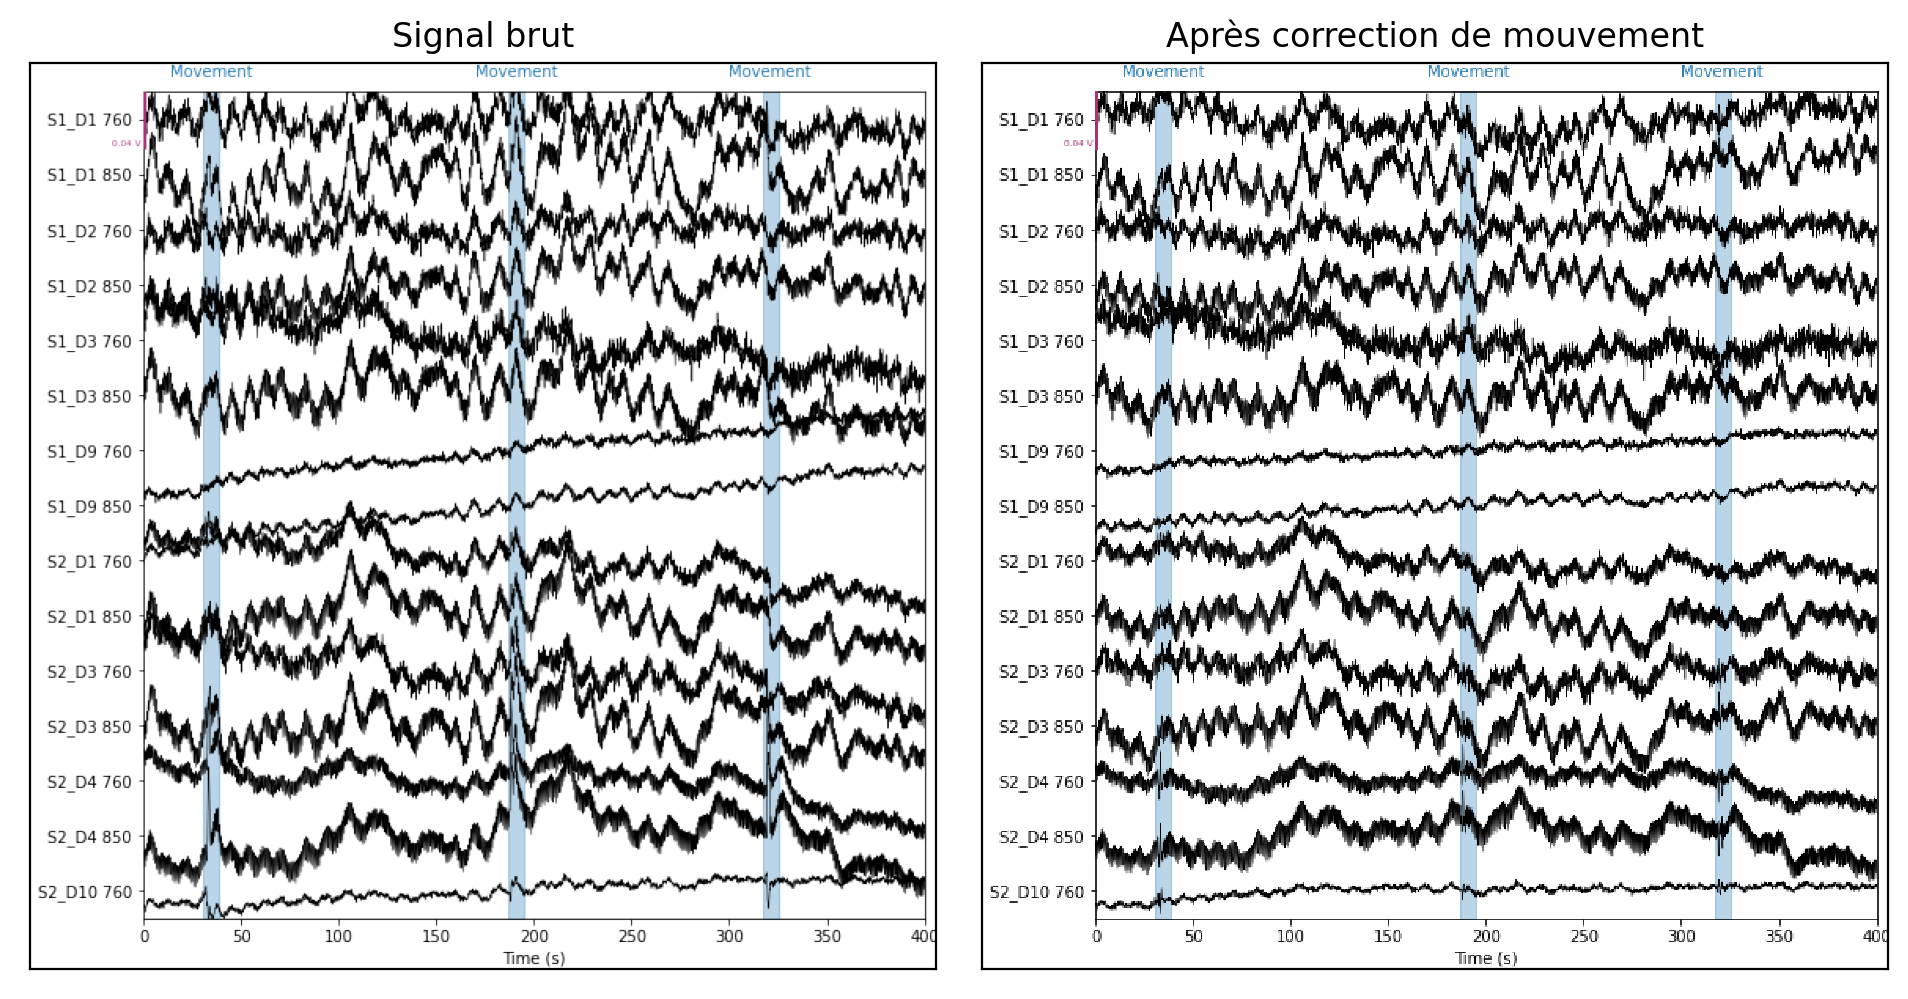

In [3]:
from mne.preprocessing.nirs import (optical_density,
                                    temporal_derivative_distribution_repair)
raw_od = optical_density(raw_intensity)
new_annotations = mne.Annotations([31, 187, 317], [8, 8, 8],
                                  ["Movement", "Movement", "Movement"])
raw_od.set_annotations(new_annotations)
plt_od = raw_od.plot(n_channels=15, duration=400, show_scrollbars=False)
plt_od.savefig("imagerie_optique/fnirs-od.png")

raw_tddr = temporal_derivative_distribution_repair(raw_od)
plot_tddr = raw_tddr.plot(n_channels=15, duration=400, show_scrollbars=False)
plot_tddr.savefig("imagerie_optique/fnirs-tddr.png")

# Make figure
from matplotlib import pyplot as plt
import imageio
fig1, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=200,
                        subplot_kw={'xticks': [], 'yticks': []})
fig1.subplots_adjust(hspace=0.3, wspace=0.05)
im = imageio.imread("imagerie_optique/fnirs-od.png")
ax.flat[0].imshow(im, interpolation='antialiased')
ax.flat[0].set_title('Signal brut')
im = imageio.imread("imagerie_optique/fnirs-tddr.png")
ax.flat[1].imshow(im, interpolation='none')
ax.flat[1].set_title('Après correction de mouvement')

# Glue the figure
from myst_nb import glue
glue("fnirs-motion-fig", fig1, display=False)

```{glue:figure} fnirs-motion-fig
:figwidth: 800px
:name: "fnirs-motion-fig"
 Corrections des artefacts de mouvement dans une acquisition d'imagerie optique. Figure générée par du code python adapté d'un [tutoriel MNE python](https://mne.tools/stable/auto_examples/preprocessing/fnirs_artifact_removal.html#sphx-glr-auto-examples-preprocessing-fnirs-artifact-removal-py) par P. Bellec sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).
```
Tout comme les données d'IRMf, les données d'imagerie optique sont sensibles au mouvement. Il est possible de tirer partie de l'excellente résolution d'acquisition de l'imagerie optique pour identifier des changements brusques dans le signal, indicateurs de mouvement. Ces changments brusques peuvent alors être corrigés, tel qu'illustré dans la {numref}`fnirs-motion-fig`.

### Filtrage

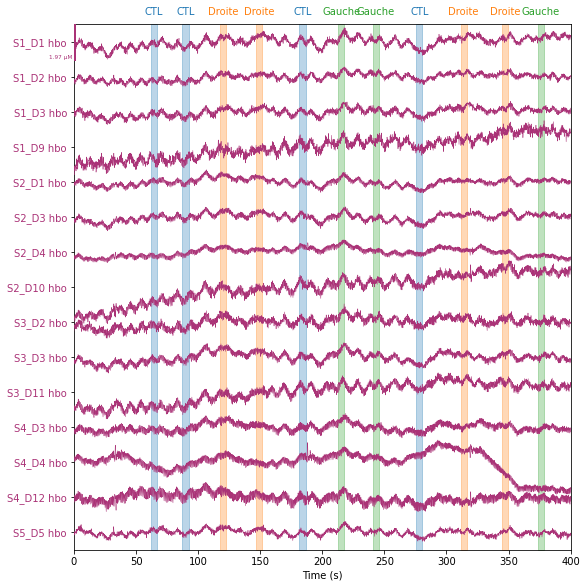

Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.05 - 0.7 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.05


- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)


- Upper passband edge: 0.70 Hz


- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)


- Filter length: 1291 samples (165.248 sec)


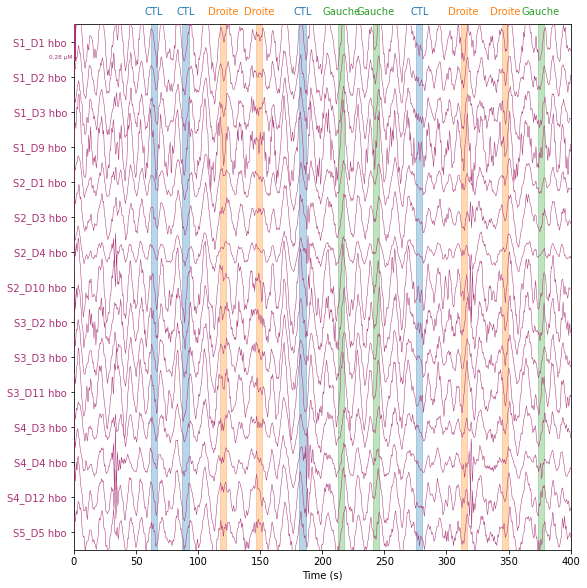

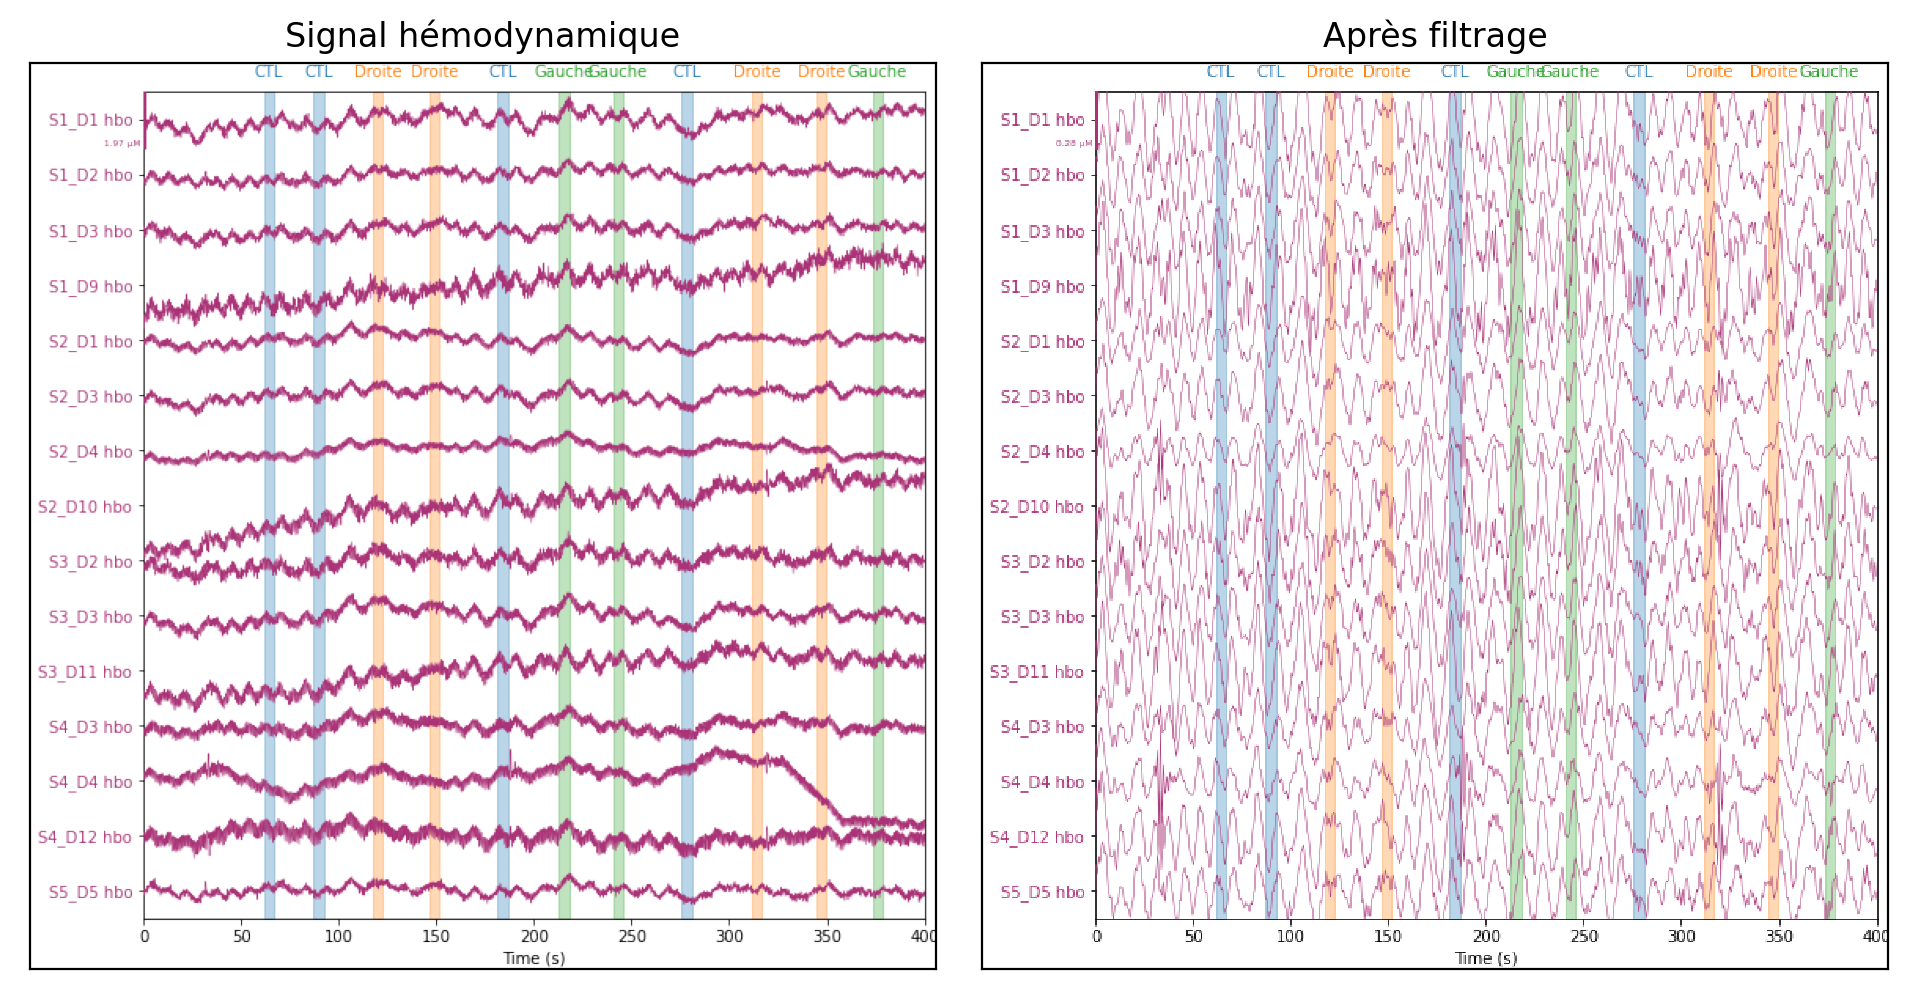

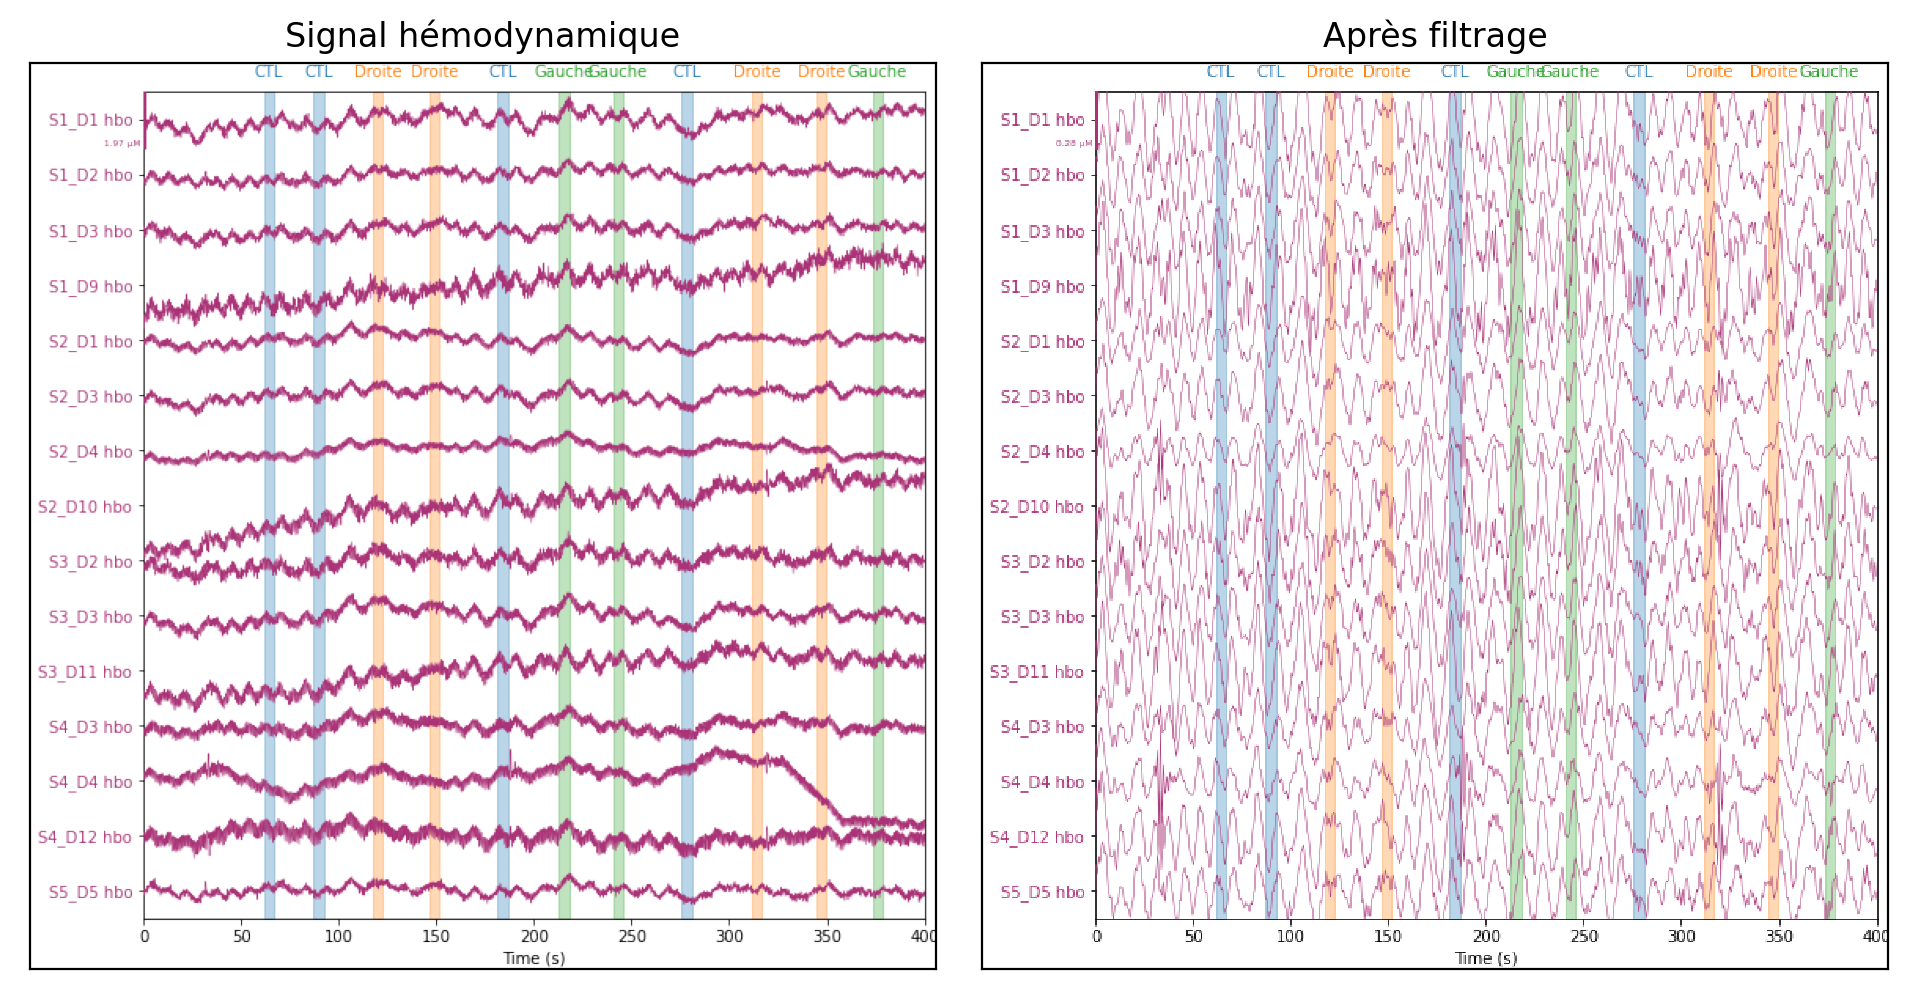

In [4]:
# Reconstruction des données d'hémoglobine
raw_od = optical_density(raw_intensity)
raw_tddr = temporal_derivative_distribution_repair(raw_od)
raw_haemo = mne.preprocessing.nirs.beer_lambert_law(raw_tddr, ppf=6)
plot_hemo = raw_haemo.plot(n_channels=15, scalings="auto",
              duration=400, show_scrollbars=False)
plot_hemo.savefig('imagerie_optique/fnirs-hbo2.png')

# filtrage des données
raw_haemo = raw_haemo.filter(0.05, 0.7, h_trans_bandwidth=0.2,
                             l_trans_bandwidth=0.02)
plot_hemo = raw_haemo.plot(n_channels=15, scalings="auto",
              duration=400, show_scrollbars=False)
plot_hemo.savefig('imagerie_optique/fnirs-filtered.png')

# Make figure
from matplotlib import pyplot as plt
import imageio
fig1, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=200,
                        subplot_kw={'xticks': [], 'yticks': []})
fig1.subplots_adjust(hspace=0.3, wspace=0.05)
im = imageio.imread("imagerie_optique/fnirs-hbo2.png")
ax.flat[0].imshow(im, interpolation='antialiased')
ax.flat[0].set_title('Signal hémodynamique')
im = imageio.imread("imagerie_optique/fnirs-filtered.png")
ax.flat[1].imshow(im, interpolation='none')
ax.flat[1].set_title('Après filtrage')

# Glue the figure
from myst_nb import glue
glue("fnirs-filtrage-fig", fig1, display=False)

```{glue:figure} fnirs-filtrage-fig
:figwidth: 800px
:name: "fnirs-filtrage-fig"
 Filtrage des données HbO2 pour éliminer les dérives lentes et les fréquences cardiaques. Figure générée par du code python adapté d'un [tutoriel MNE python](https://mne.tools/stable/auto_tutorials/preprocessing/70_fnirs_processing.html#sphx-glr-auto-tutorials-preprocessing-70-fnirs-processing-py) par P. Bellec sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).
```
Un autre point commun avec l'IRMf est la présence de différentes sources de bruit, qui peuvent être réduites par des techniques de filtrage. Ces techniques sont plus efficaces en imagerie optique qu'en IRMf, car on dispose d'une meilleure résolution d'acquisition. Il est possible de supprimer les dérives lentes, comme on l'avait vu en IRMf, mais aussi d'éliminer les fréquences cardiaques, ce qui est difficile de faire en IRMf où le TR est généralement supérieur à 1 seconde.
## Application en neuroscience cognitive

### Réponse hémodynamique

Used Annotations descriptions: ['CTL', 'Droite', 'Gauche']


Not setting metadata


Not setting metadata


90 matching events found


Setting baseline interval to [-4.992, 0.0] sec


Applying baseline correction (mode: mean)


0 projection items activated


Loading data for 90 events and 157 original time points ...


0 bad epochs dropped


combining channels using "mean"


combining channels using "mean"


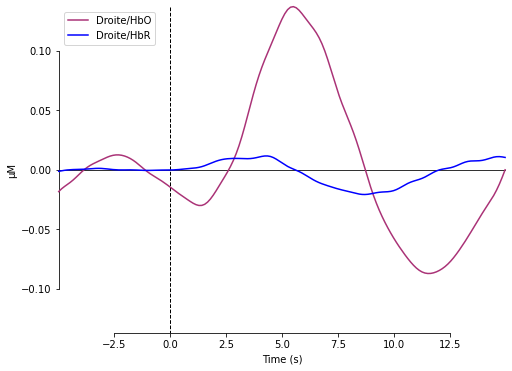

In [5]:
reject_criteria = dict(hbo=80e-6)
tmin, tmax = -5, 15
events, event_dict = mne.events_from_annotations(raw_haemo)

epochs = mne.Epochs(raw_haemo, events, event_id=event_dict,
                    tmin=tmin, tmax=tmax,
                    reject=reject_criteria, reject_by_annotation=True,
                    proj=True, baseline=(None, 0), preload=True,
                    detrend=None, verbose=True)

evoked_dict = {'Droite/HbO': epochs['Droite'].average(picks='hbo'),
               'Droite/HbR': epochs['Droite'].average(picks='hbr'),
              }

# Renomme les canaux pour corriger la fréquence dans ch_name
for condition in evoked_dict:
    evoked_dict[condition].rename_channels(lambda x: x[:-4])

color_dict = dict(HbO='#AA3377', HbR='b')

plot_hrf = mne.viz.plot_compare_evokeds(evoked_dict, combine="mean", ci=0.95,
                             colors=color_dict)
plot_hrf[0].savefig('imagerie_optique/fnirs-evoked.png')

```{figure} imagerie_optique/fnirs-evoked.png
---
width: 600px
name: fnirs-evoked-fig
---
Activité HbO2 et HbR évoquée par une tâche de mouvement de doigt (tapping) et une tâche contrôle, moyennée sur l'ensemble des sources.
Cette figure est générée par du code python adapté d'un [tutoriel](https://mne.tools/stable/auto_tutorials/preprocessing/70_fnirs_processing.html#sphx-glr-auto-tutorials-preprocessing-70-fnirs-processing-py) de la librairie [MNE python](https://mne.tools) (cliquer sur + pour voir le code) et est distribuée par P. Bellec sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).
```
L'imagerie optique permet de réaliser des expériences cognitives similaires à ce que l'on peut faire en IRMf.
Dans la {numref}`fnirs-filtrage-fig`, on voit une série d'**évènements** qui ont été annotés.
Ces évènements sont de trois types: mouvement du doigt à `gauche`, mouvement du doigt à `droite` et condition de `contrôle`.
La figure ci-dessus présente les résultats d'une analyse par **potentiel évoqué** pour la condition `droite`: de petites fenêtres de signal allant de 5 secondes avant chaque événement à 15 secondes après chaque événement ont été extraites et moyennées.
Les données de l'ensemble des sources ont été moyennées pour les mouvements à `droite`.
Les mesures HbO2 et HbR ont en revanche été séparées.
On voit un profil caractéristique de réponse hémodynamique en HbO2.
Comme attendu, le HbRsuit un profil inversé avec un pic plus tardif et beaucoup plus petit (en valeur absolue).

### Carte d'activation

No projector specified for this dataset. Please consider the method self.add_proj.


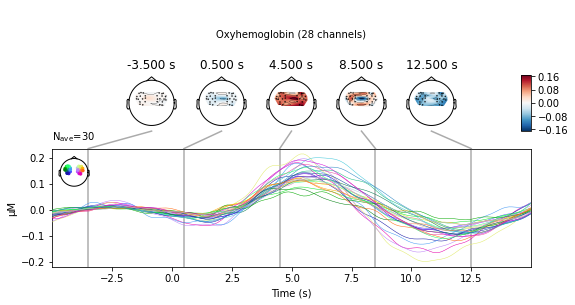

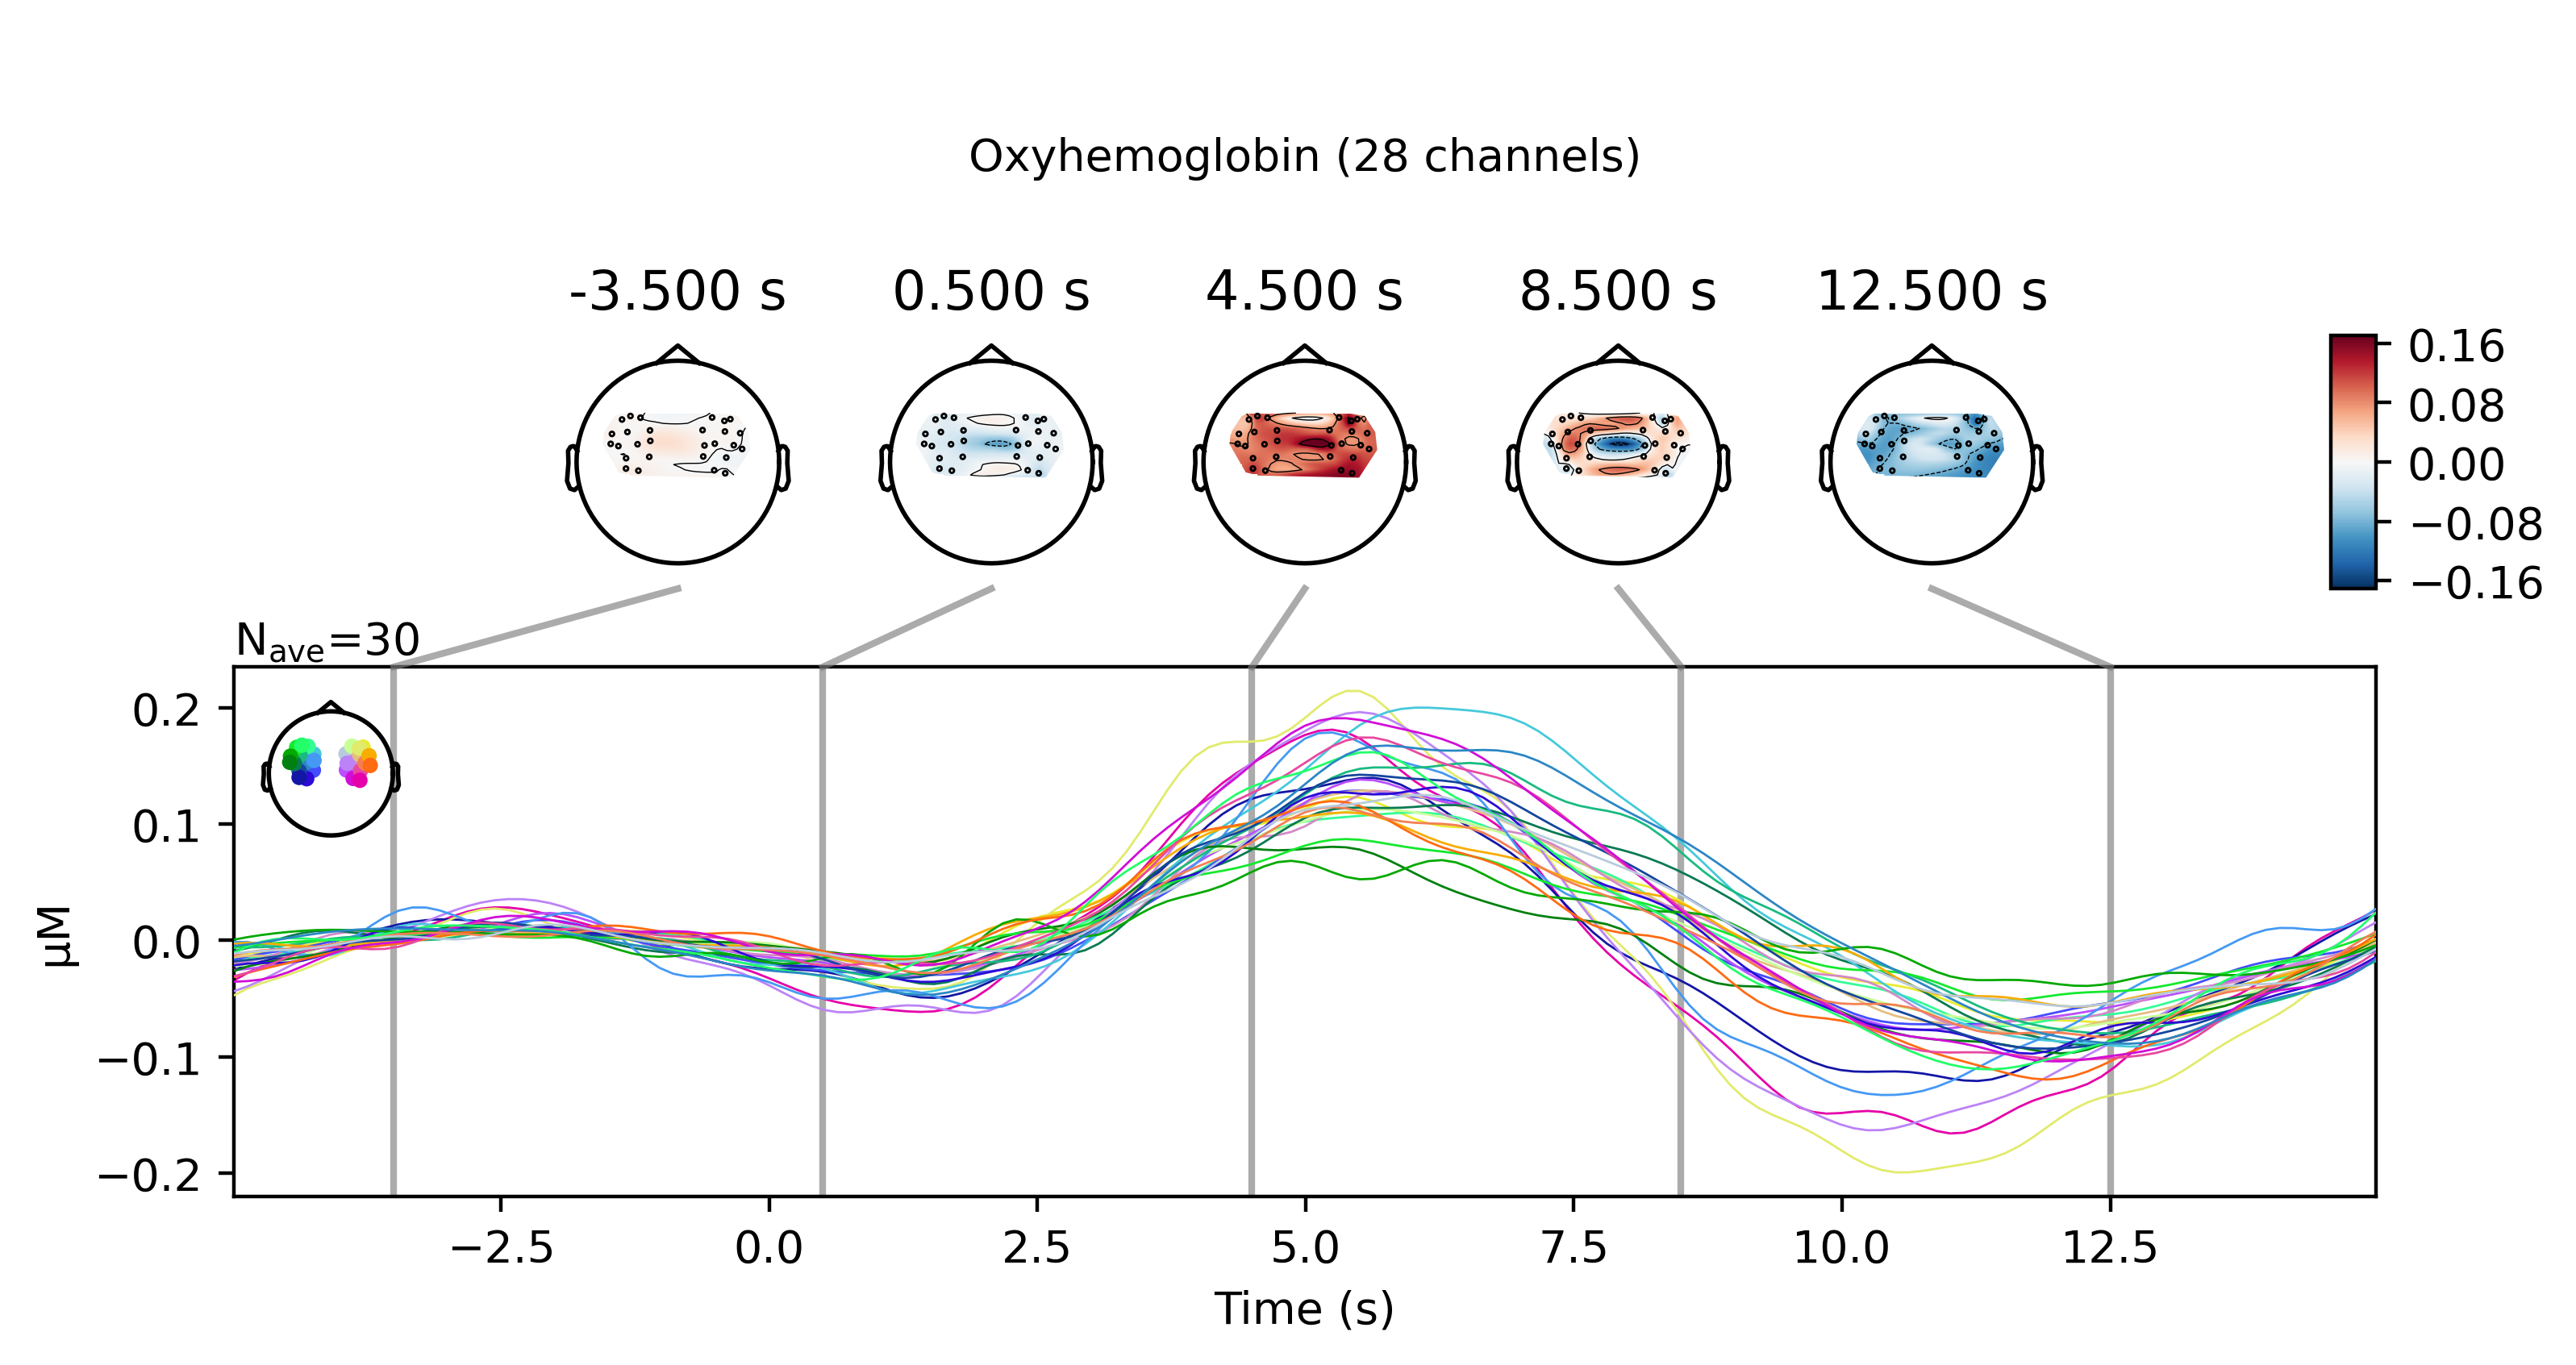

In [6]:
times = np.arange(-3.5, 13.2, 4.0)
topomap_args = dict(extrapolate='local', res=50)
plot_epochs = epochs['Droite'].average(picks='hbo').plot_joint(
    times=times, topomap_args=topomap_args)
plot_epochs.set_dpi(400)

from myst_nb import glue
glue("fnirs-activation-fig", plot_epochs, display=False)

```{glue:figure} fnirs-activation-fig
:figwidth: 800px
:name: fnirs-activation-fig
:align: center
Potentiel évoqué par un mouvement du doigt à `droite`, pour l'ensemble des capteurs. La mosaique de couleurs à gauche du graphe indique la localisation spatiale correspondant à chaque courbe. Pour différents points temps, une carte topographique d'activation indique le niveau d'activité évoquée pour chaque source spatiale, et pour chaque instant. Cette figure est générée par du code python adapté d'un [tutoriel](https://mne.tools/stable/auto_tutorials/preprocessing/70_fnirs_processing.html#sphx-glr-auto-tutorials-preprocessing-70-fnirs-processing-py) de la librairie [MNE python](https://mne.tools) (cliquer sur + pour voir le code), et est distribuée par P. Bellec sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).
```

Le profil de réponse évoquée par un mouvement du doigt à `droite` peut aussi être estimé indépendamment pour chacune des sources spatiales mesurées. Il est ainsi possible de reconstruire une carte d'activité évoquée, au cours du temps. En IRMf, ce type de carte est généralement résumée avec un seul paramètre d'amplitude de la réponse, mais la vitesse d'échantillonnage supérieure de l'imagerie optique permet d'étudier la dynamique de la réponse vasculaire de manière plus fine. Dans ce cas, dans la mesure où les paires d'émetteurs/capteurs ont été disposées autour du cortex sensorimoteur, l'ensemble des sources présentent une réponse évoquée forte en HbO2.


### Flexibilité expérimentale
```{figure} imagerie_optique/fnirs-high-altitude.jpg
---
width: 300px
name: fnirs-high-altitude-fig
---
Mesure de l'oxygénation cérébrale à haute altitude avec un système d'imagerie optique portatif (PortaLite, Artinis Medical Systems). Image tirée de [wikipédia](https://upload.wikimedia.org/wikipedia/commons/5/5b/Picture_of_NIRS_measurement_at_high_alltitude.jpg) sous licence [CC-BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/deed.en).
```
Une des grandes forces de l'imagerie optique par rapport au FDG TEP ou bien à l'IRMf est la flexibilité expérimentale. Même si les artefacts de mouvement peuvent être un problème, il est possible d'enregistrer l'activité d'un athlète en mouvement ({numref}`fnirs-high-altitude-fig`). Il est aussi possible d'enregistre l'activité du cerveau d'un [musicien qui pratique son instrument](https://upload.wikimedia.org/wikipedia/commons/transcoded/3/33/Imaging-Brain-Function-with-Functional-Near-Infrared-Spectroscopy-in-Unconstrained-Environments-Video2.ogv/Imaging-Brain-Function-with-Functional-Near-Infrared-Spectroscopy-in-Unconstrained-Environments-Video2.ogv.480p.vp9.webm), ou bien encore de [deux musiciens qui jouent ensemble](https://upload.wikimedia.org/wikipedia/commons/transcoded/b/bd/Imaging-Brain-Function-with-Functional-Near-Infrared-Spectroscopy-in-Unconstrained-Environments-Video3.ogv/Imaging-Brain-Function-with-Functional-Near-Infrared-Spectroscopy-in-Unconstrained-Environments-Video3.ogv.360p.vp9.webm) (une technique appelée hyper-scanning). Même s'il est possible de [jouer du violoncelle dans un IRM](https://ieeexplore.ieee.org/document/6688614), ce type d'expérience est bien plus facile de mise en oeuvre avec l'imagerie optique. Cette technique est aussi plus simple à mettre en oeuvre chez des sujets qui ont des difficultés à rester immobiles, comme les très jeunes enfants ({numref}`fiducials-fig`).

## Conclusions
Dans ce cours, nous avons vu les principes de l'imagerie optique. Plus précisément, nous avons vu:
- Comment la lumière proche infrarouge permet de mesurer le couplage neurovasculaire.
- Comment l'utilisation d'un montage d'émetteurs et de récepteurs sur le scalp permet d'acquérir des signaux couvrant une portion du cerveau.
- Comment les signaux d'imagerie optique sont nettoyés pour améliorer la qualité.
- Comment on peut générer une carte d'activation en réponse à une série d'événements.

## Exercices
```{admonition} Exercice 8.1
Les données d’imagerie optique sont (vrai/faux, expliquez vos réponses)
 1. Des données avec une meilleure résolution temporelle que l’IRMf.
 2. Des données plus interprétables que l’IRMf.
 3. Des données plus faciles à recueillir que l’IRMf.
 4. Des données moins chères à recueillir que l’IRMf.
 5. Des données qui donnent une image détaillée de l’activité neuronale dans le cortex.
```
```{admonition} Exercice 8.2
Quel est l’avantage de travailler avec des données d’imagerie optique reconstruite sur la surface du cortex, plutôt que directement avec les données de capteurs sur le scalp?
```

```{admonition} Exercice 8.3
On enregistre l’activité cérébrale d’un patient en imagerie optique au niveau du cortex sensorimoteur.
Peut-on positionner précisément l’activité au niveau du scalp du participant?
Et au niveau cérébral?
Si l’on dispose d’une IRM T1 individuelle du sujet, est ce que cela peut améliorer la localisation de l’activité dans le cerveau?
```

```{admonition} Exercice 8.4
On souhaite mesurer l’activité du cortex moteur durant la vie quotidienne d’une personne âgée. Citez un avantage, une limitation et une considération éthique pertinents pour l’utilisation de l’imagerie optique pour ce projet.

Citez deux exemples de problèmes qui peuvent faire échouer un enregistrement en imagerie optique.
```

```{admonition} Exercice 8.5
Est ce que la résolution spatiale de l’imagerie optique est identique chez tous les sujets, si on utilise le même appareil pour l’acquisition?
```

```{admonition} Exercice 8.6
On a disposé un émetteur de lumière au niveau de l’hémisphère gauche, et un capteur en face de l’émetteur, au niveau de l’hémisphère droit. Peut on associer le signal à une aire particulière du cerveau? Quel type d’expérience permettrait de modifier l’amplitude du signal mesuré avec un tel dispositif expérimental?
```

```{admonition} Exercice 8.7
Pour répondre aux questions de cet exercice, lisez d'abord l'article *Distinct hemispheric specializations for native and non-native languages in one-day-old newborns identified by fNIRS* de Vannasing et collaborateurs (disponible en [accès libre](https://doi.org/10.1016/j.neuropsychologia.2016.01.038) sous licence CC-BY-NC-ND et publié dans le journal Neuropsychologia en 2016. Les questions suivantes requièrent des réponses à développement court.
- Quel type de participants a été recruté dans cette étude?
- Quel est l'objectif principal de l'étude?
- Quelle technique de neuroimagerie est utilisée? S'agit-il d'une technique structurelle ou fonctionnelle?
- Dans quelle figure est décrit le montage d'imagerie optique?
- Quels types de stimuli ont été utilisés?
- Comment est générée l'activité évoquée?
- Quelle figure (ou tableau) répond à l'objectif principal de l'étude?
- Quel est le résultat principal de l'étude?
```